In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score, precision_score, recall_score, f1_score
import pickle #me permite guardar objetos de python
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
#import lightgbm as lgb
#from catboost import CatBoostClassifier librerias que toman datos numericos y categoricos. 

### Observaciones:

Importamos nuestros datos de EDA previo, para comenzar el análisis del ejercicio aplicando el modelo árbol de decisión.

In [33]:
df =  pd.read_csv('/workspaces/Antonio27M-machine-learning/data/processed/eda_insulina.csv')

In [34]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [35]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,20.536458,0.2,0.0,0.304,21
618,9,112,82,24.000000,0.2,28.2,1.282,50
346,1,139,46,19.000000,83.0,28.7,0.654,22
294,0,161,50,20.536458,0.2,21.9,0.254,65
231,6,134,80,37.000000,370.0,46.2,0.238,46


In [36]:
y_train.head()

60     0
618    1
346    0
294    0
231    1
Name: Outcome, dtype: int64

In [37]:
model = DecisionTreeClassifier(random_state=18)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,18
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [38]:
model.score(X_train, y_train) 

1.0

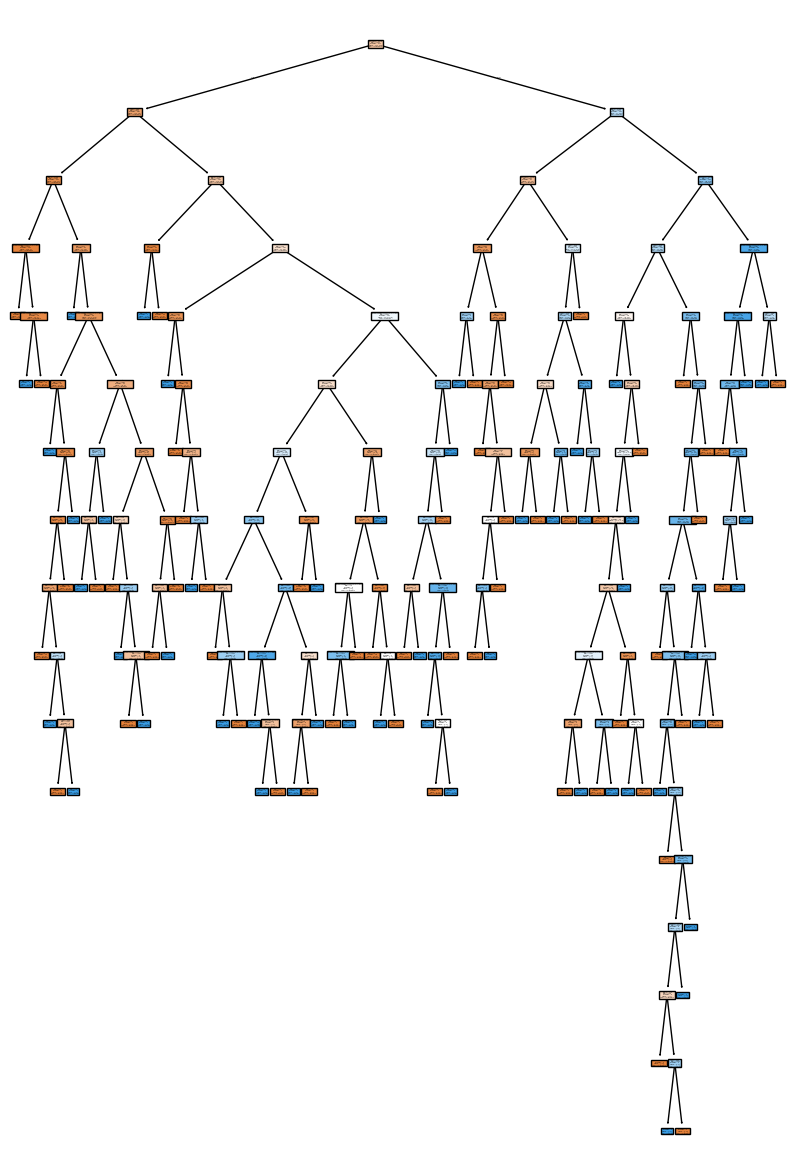

In [47]:
fig = plt.figure(figsize=(10,15))
tree.plot_tree(model, feature_names=list(X_train.columns), class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()

### Observaciones:

Se realiza un gráfico para observar los diferentes niveles dentro de nuestro modelo, visualizando más de 12 niveles. 

In [40]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [41]:
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.7337662337662337,
 0.6129032258064516,
 0.6909090909090909,
 0.6495726495726496)

### Observaciones: 

Resultado original sin alteraciones en los parámetros con un porcentaje 73%.

In [42]:
param_grid = {'max_depth': [3, 5, 10],'criterion':['gini', 'entropy'],'max_features': ['sqrt', 'log2', None],
                   'min_samples_split': [10, 20, 50], 'min_samples_leaf': [1, 2, 4]}

In [43]:
grid_search_decision = GridSearchCV(DecisionTreeClassifier(random_state=18),
                                param_grid,
                                cv=5,
                                scoring='accuracy',
                                n_jobs=-1,
                                verbose=1)

grid_search_decision.fit(X_train, y_train)

grid_search_decision.best_params_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


{'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [44]:
y_pred_uno = grid_search_decision.predict(X_test)
y_pred_uno

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [45]:
# metricas arbol de decision
accuracy_score(y_test, y_pred_uno), precision_score(y_test, y_pred_uno), recall_score(y_test, y_pred_uno), f1_score(y_test, y_pred_uno) 

(0.7597402597402597, 0.68, 0.6181818181818182, 0.6476190476190476)

### Observaciones: 

Resultado segundario realizando hiperparametrización con diferentes resultados, tomando el resultado más elevado con un porcentaje 76%.

In [46]:
with open('/workspaces/Antonio27M-machine-learning/models/modelo-arbol.pkl', 'wb') as file:
    pickle.dump(grid_search_decision.best_estimator_, file)